<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/Proyecto_final_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Vision_producto](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

#**PROYECTO INTEGRADOR FINAL: BANK TELEMARKETING**
El objetivo es predecir si un cliente se suscribirá a un depósito a plazo fijo que se le ofrece mediante una campaña de telemarketing.

Para ello se propone crear un modelo de clasificación de aprendizaje automático con la finalidad poder usarlo en una población definida por un banco minorista de Portugal en el contexto de la recesión global del año 2008.
[Link Product Vision Board](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

## **DESCRIPCION DE LOS DATOS**
**1. Información Importante:**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder saber si el cliente se suscribiría a un depósito a plazo fijo.





**2. Objetivo:**

El objetivo es diseñar un modelo de clasificación para predecir si el cliente suscribirá un depósito a plazo (variable y).

**3. Número de Instancias:**

45211 for bank-full.csv (4521 for bank.csv)

**4. Número de atributos:**

 16 varaibles de entrada

 1 variable de salida o variable Objetivo


**5. Información sobre las Variables:**

**Variables de Entrada**
1. age: Edad del cliente (numérico).

2. job: Tipo de empleo del cliente (categórico): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".

3. marital: Estado civil del cliente (categórico): "married", "divorced", "single" (Nota: "divorced" significa divorciado o viudo).

4. education: Nivel de educación del cliente (categórico): "unknown", "secondary", "primary", "tertiary".

5. default: ¿Tiene el cliente crédito en mora? (binario): "yes", "no".

6. balance: Saldo promedio anual, en euros, del cliente (numérico).

7. housing: ¿Tiene el cliente un préstamo hipotecario? (binario): "yes", "no".

8. loan: ¿Tiene el cliente un préstamo personal? (binario): "yes", "no".

9. contact: Tipo de comunicación de contacto (categórico) relacionado con el último contacto de la campaña actual: "unknown", "telephone", "cellular".

10. day: Último día del mes en que se realizó el último contacto (numérico).

11. month: Último mes del año en que se realizó el último contacto (categórico): "jan", "feb", "mar", ..., "nov", "dec".

12. duration: Duración del último contacto en segundos (numérico).

13. campaign: Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

14. pdays: Número de días transcurridos desde el último contacto de una campaña anterior con el cliente (numérico, -1 significa que el cliente no fue contactado anteriormente).

15. previous: Número de contactos realizados antes de esta campaña y para este cliente (numérico).

16. poutcome: Resultado de la campaña de marketing anterior (categórico): "unknown", "other", "failure", "success".

**Variable objetivo (target deseado):**

17. y: ¿El cliente ha suscrito un depósito a plazo? (binario): "yes", "no".



**6. Missing Attribute Values:**

None


In [65]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

# 1. Explorar los datos para obtener información

In [66]:
mainpath = "bank_full.csv"
data = pd.read_csv(mainpath,sep=";")


In [67]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observaciones:**

La muestra tiene:

45,211 instancias

17 variables ( columnas).

  - 10 variables categóricas

  - 7 variables numéricas

La variable Objetivo es categorica binaria: yes / no

No hay valores missing


# 1.1 Análisis de la Variable Objetivo (y)
¿El cliente invirtió en un depósito a plazo fijo? : yes / no


In [69]:
#La variable Objetivo de tipo categórica se mapea en 0=no , yes=1
data["y"].unique()
data["y"]=data["y"].map({'no':0, 'yes':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='count'>

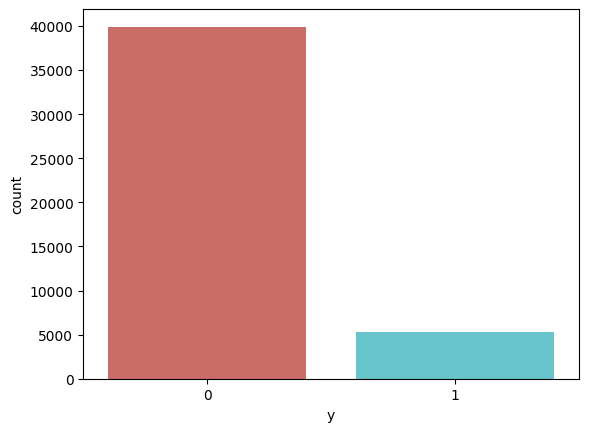

In [70]:
# Analizando la distribución de la variable objetivo.
sns.countplot(x='y', data = data, palette = 'hls')

In [71]:
#Media de la variable objetivo

print("Media de Y: ", data.y.mean(). round(3))
# Distribución de frecuencias de las respuestas a la suscripción de depósitos a plazo fijo (y)
frecuencias = data.groupby('y').agg({'y': ['count',  lambda x: 100*x.size/len(data)]})
frecuencias.columns = ['fi', 'hi%']
print("\nDistribución de frecuencias")
frecuencias


Media de Y:  0.117

Distribución de frecuencias


,fi,hi%
y,,
0,39922,88.30152
1,5289,11.69848


**Se observó:**

1. *La variable objetivo es Categórica binaria.*  Por lo tanto, para el modelo de clasificación se codificó así:

> 0='no'   No se suscribió a un depósito a plazo fijo.

> 1='yes'  Si se suscribió a un depósito a plazo fijo.

2. La Distribucipon de frecuencias de la variable objetiva nos muestra una data desbalanceada. 88.3% de la muestra no se suscribió a un depósito a plazo fijo. Esto se puede explicar por la desconfianza en el banco minorista dada la crisis del sistema financiero de Portugal el contexto de la crisis financiera del 2008.

3. La media 0.117, nos indica que en promedio se suscribieron 12 de cada 100. Lo cual es bajo dado el desbalanceo de la data.


# 1.1. Análisis de las variables categóricas

In [72]:
# Lista de variables categóricas
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()

print("Lista de Variables Categóricas: ",variables_categoricas,"\n")
# Seleccionamos un subconjunto del dataset que sólo incluya las variables categóricas.
categorical_columns =data.select_dtypes(include=['object'])
categorical_columns.describe().transpose()

Lista de Variables Categóricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 



,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


In [ ]:
# Histograma de freciencias de las variables categóricas
for column in categorical_columns:
    category_counts = data[column].value_counts(normalize=True)  # Calcular las frecuencias relativas
    plt.figure(figsize=(6, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    plt.title(f"Gráfico de barras - {column}")
    plt.xticks(rotation=30)

    # Mostrar las frecuencias relativas en las etiquetas de las barras
    for i, v in enumerate(category_counts.values):
        plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.show()

**Análisis de la relación entre variables categóricas y una variable objetivo**

 Tabla de contingencia.

In [ ]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data, x=column,hue='y')
    plt.xticks(rotation='vertical')
    plt.show()

column_cat = data.select_dtypes(include='object').columns

for _ in column_cat:
    plot_categorial(_)

In [75]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
for column in categorical_columns:
  print("\n")
  print(data.groupby(column).agg(count=('y', 'count'), hi=('y', 'mean')).sort_values(by="hi", ascending=False))




               count        hi
job                           
student          938  0.286780
retired         2264  0.227915
unemployed      1303  0.155027
management      9458  0.137556
admin.          5171  0.122027
self-employed   1579  0.118429
unknown          288  0.118056
technician      7597  0.110570
services        4154  0.088830
housemaid       1240  0.087903
entrepreneur    1487  0.082717
blue-collar     9732  0.072750


          count        hi
marital                  
single    12790  0.149492
divorced   5207  0.119455
married   27214  0.101235


           count        hi
education                 
tertiary   13301  0.150064
unknown     1857  0.135703
secondary  23202  0.105594
primary     6851  0.086265


         count        hi
default                 
no       44396  0.117961
yes        815  0.063804


         count        hi
housing                 
no       20081  0.167024
yes      25130  0.077000


      count        hi
loan                 
no    37967  0.126

**Se observó:**
Analizando la relación de las variables categóricas con la variable objetivo (y), tenemos:

1. En **Job:** La categoría "*student*" tiene la mayor probabilidad (28.7%) de suscribir un depósito a plazo fijo.
2. En **marital:** La categoría "*single*" tiene la mayor probabilidad (14.9%) de suscribir un depósito a plazo fijo.     
3. En **education:** La categoría "*tertiary*" tiene la mayor probabilidad (15%) de suscribir un depósito a plazo fijo.           


# 1.2 Análisis de la variable numérica

In [76]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [77]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
print("Lista de Variables Numéricas: ",variables_numericas,"\n")
#  Seleccionamos un subconjunto del dataset que solo incluye a las variables numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float'])
numeric_columns.describe().transpose()

Lista de Variables Numéricas:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y'] 



,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [97]:
len(cols_num)

7

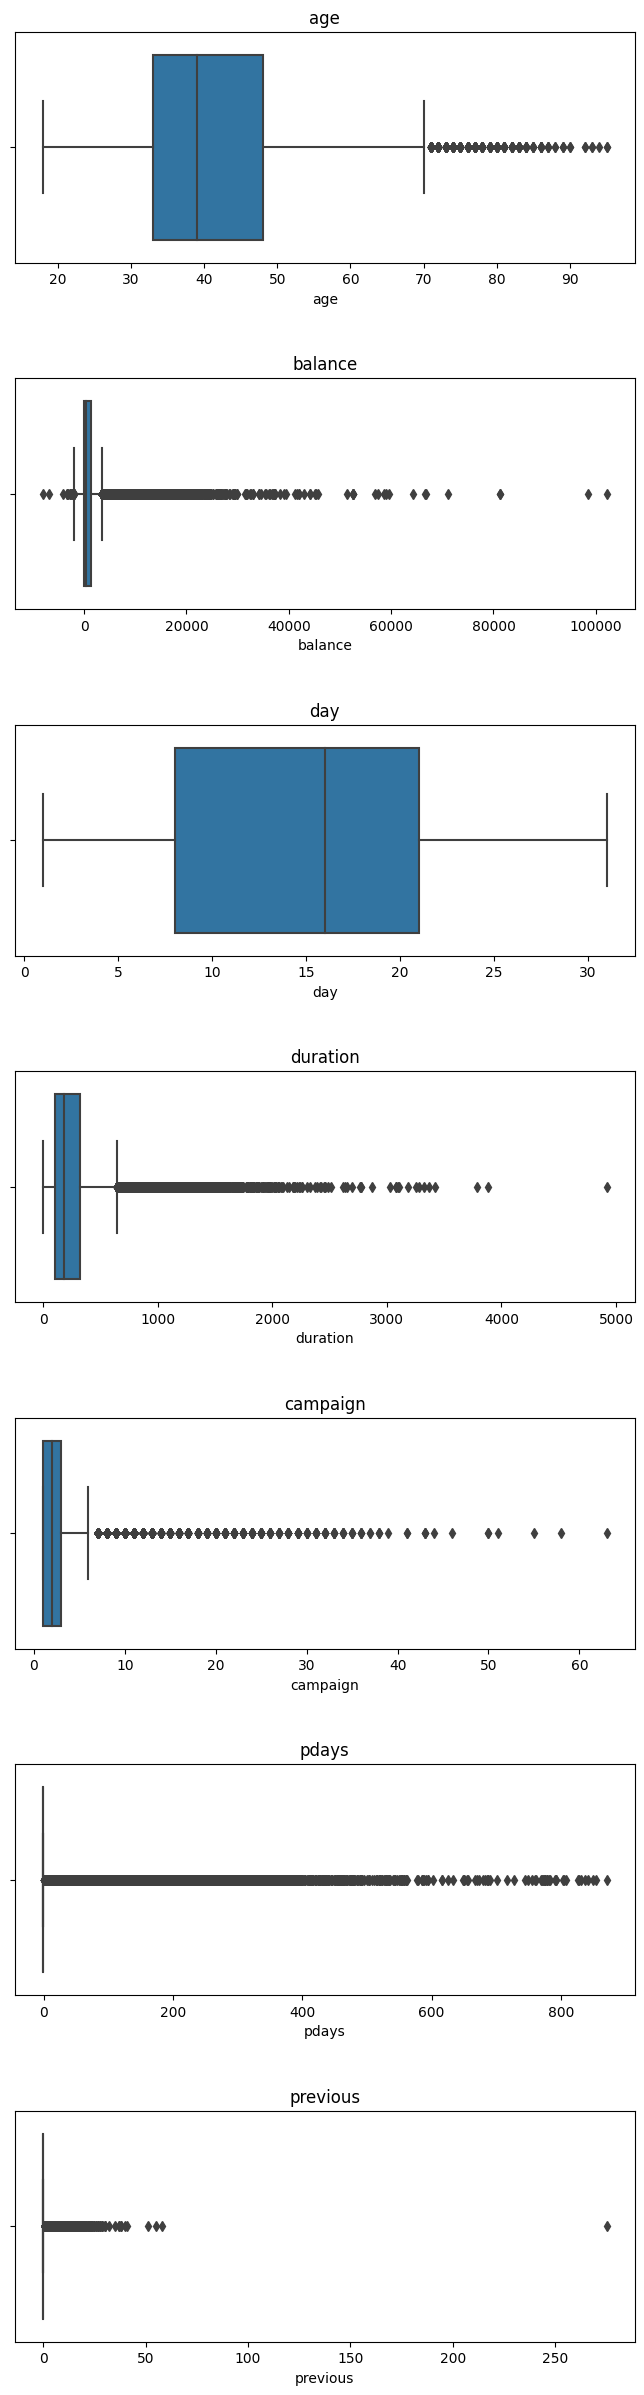

In [98]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
#cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous']
cols_num =variables_numericas[:-1]
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# 2. Selección de muestras

In [138]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=123)

In [140]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 45211
Tamaño de train: 31647
Tamaño de test: 13564


# 3. Pre selección de variables

In [141]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0


In [142]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)

pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0


In [143]:
# Procedemos con crear la columna missig para ver el porcentaje de valores perdidos:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0,0.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0,0.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0,0.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0,0.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0,0.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0,0.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0,0.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


In [145]:
variables_categoricas = train.select_dtypes(include=['object']).columns.tolist()

print("Lista de Variables Categóricas: ",variables_categoricas,"\n")

Lista de Variables Categóricas:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 



In [146]:
# Conteo de los niveles en las diferentes columnas categóricas:
# Como se verá en su ejecución, todas las variables categóricas poseen mas de 1 subnivel, por tal motivo no podremos a primera vista, eliminar alguna columna.
cols_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for col in cols_cat:
  print('Columna ', col, ': ' , train[col].nunique() ,  ' Subniveles')

Columna  job :  12  Subniveles
Columna  marital :  3  Subniveles
Columna  education :  4  Subniveles
Columna  default :  2  Subniveles
Columna  housing :  2  Subniveles
Columna  loan :  2  Subniveles
Columna  contact :  3  Subniveles
Columna  month :  12  Subniveles
Columna  poutcome :  4  Subniveles
Columna  y :  2  Subniveles


In [148]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0
day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0
campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0
pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0
y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0


In [149]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45211, 17)
Tamaño del set después de eliminar las filas repetidas: (45211, 17)


# 4. Tratamiento de variables

In [150]:

train['job'].value_counts()

blue-collar      6836
management       6593
technician       5333
admin.           3604
services         2893
retired          1585
self-employed    1112
entrepreneur     1024
unemployed        904
housemaid         902
student           664
unknown           197
Name: job, dtype: int64

In [151]:
train['job'].drop_duplicates()

44828       management
11344         services
28435      blue-collar
39971       technician
39152     entrepreneur
13497          student
42975          retired
36475           admin.
22356        housemaid
10092    self-employed
3461        unemployed
22779          unknown
Name: job, dtype: object

In [152]:
# Mapear las categorías a los nuevos valores
mapping = {
    'management': 'Estable',
    'services': 'Inestable',
    'blue-collar': 'Inestable',
    'technician': 'Moderado',
    'entrepreneur': 'Moderado',
    'student': 'Variable',
    'retired': 'Estable',
    'admin.': 'Estable',
    'housemaid': 'Inestable',
    'self-employed': 'Moderado',
    'unemployed': 'Inestable',
    'unknown': 'Variable'
}

# EN TRAIN: Crear la nueva columna "financial-stability" utilizando el mapeo de categorías
train['financial-stability'] = train['job'].map(mapping)

# Eliminar la columna "JOB" si ya no es necesaria
train.drop('job', axis=1, inplace=True)

train.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,financial-stability
44828,34,married,tertiary,no,3301,yes,no,cellular,17,sep,164,5,92,6,success,1,Estable
11344,47,married,primary,no,504,no,yes,unknown,18,jun,156,3,-1,0,unknown,0,Inestable
28435,26,single,primary,no,155,yes,no,cellular,29,jan,291,1,244,4,failure,0,Inestable
39971,23,single,secondary,no,4545,no,no,cellular,3,jun,200,1,-1,0,unknown,0,Moderado
5747,47,single,tertiary,no,191,yes,no,unknown,26,may,212,1,-1,0,unknown,0,Estable


In [153]:
train['financial-stability'].drop_duplicates()

44828      Estable
11344    Inestable
39971     Moderado
13497     Variable
Name: financial-stability, dtype: object

In [154]:
# EN TEST: Crear la nueva columna "financial-stability" utilizando el mapeo de categorías
test['financial-stability'] = test['job'].map(mapping)

# Eliminar la columna "JOB" si ya no es necesaria
test.drop('job', axis=1, inplace=True)

test.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,financial-stability
5997,26,single,secondary,no,339,yes,no,unknown,26,may,165,5,-1,0,unknown,0,Inestable
39268,34,married,secondary,no,463,yes,no,cellular,18,may,11,11,360,4,failure,0,Inestable
9555,59,married,secondary,no,444,yes,no,unknown,6,jun,137,1,-1,0,unknown,0,Estable
9044,47,married,secondary,no,0,no,no,unknown,5,jun,1446,1,-1,0,unknown,1,Moderado
42981,34,divorced,tertiary,no,2885,no,no,cellular,10,feb,314,2,156,4,other,1,Estable


In [155]:
# Actualizamos la variables categoricas

# Lista de variables categóricas
variables_categoricas = train.select_dtypes(include=['object']).columns.tolist()

print("Lista de Variables Categóricas: ",variables_categoricas,"\n")
# Seleccionamos un subconjunto del dataset que sólo incluya las variables categóricas.
categorical_columns =train.select_dtypes(include=['object'])
categorical_columns.describe().transpose()

Lista de Variables Categóricas:  ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'financial-stability'] 



,count,unique,top,freq
marital,31647,3,married,19030
education,31647,4,secondary,16266
default,31647,2,no,31091
housing,31647,2,yes,17648
loan,31647,2,no,26588
contact,31647,3,cellular,20520
month,31647,12,may,9677
poutcome,31647,4,unknown,25845
financial-stability,31647,4,Estable,11782


In [156]:

!pip install category_encoders

In [27]:

# Tratamiento con Target Encoder
# Se trabajará una consolidación con la variable "job"
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[variables_categoricas].astype('category'), train['y'])

TargetEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome'],
              handle_unknown='infrequent_if_exist')

In [28]:

TargetEncoder(cols=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome'],
              handle_unknown='infrequent_if_exist')

TargetEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome'],
              handle_unknown='infrequent_if_exist')

In [29]:

train[[x + '_coded' for x in variables_categoricas]] = encoder.transform(train[variables_categoricas].astype('category'))
test[[x + '_coded' for x in variables_categoricas]] = encoder.transform(test[variables_categoricas].astype('category'))

In [30]:

train[['contact', 'contact_coded']].head(10)

,contact,contact_coded
44828,cellular,0.149123
11344,unknown,0.040985
28435,cellular,0.149123
39971,cellular,0.149123
5747,unknown,0.040985
115,unknown,0.040985
21846,cellular,0.149123
41475,cellular,0.149123
42498,cellular,0.149123
39152,cellular,0.149123


In [31]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,job_coded,marital_coded,education_coded,default_coded,housing_coded,loan_coded,contact_coded,month_coded,poutcome_coded
44828,34,management,married,tertiary,no,3301,yes,no,cellular,17,...,1,0.132717,0.100525,0.147732,0.117944,0.078196,0.126335,0.149123,0.467626,0.643059
11344,47,services,married,primary,no,504,no,yes,unknown,18,...,0,0.090218,0.100525,0.090324,0.117944,0.165869,0.067800,0.040985,0.102267,0.092126
28435,26,blue-collar,single,primary,no,155,yes,no,cellular,29,...,0,0.076507,0.149340,0.090324,0.117944,0.078196,0.126335,0.149123,0.100798,0.124602
39971,23,technician,single,secondary,no,4545,no,no,cellular,3,...,0,0.108944,0.149340,0.105250,0.117944,0.165869,0.126335,0.149123,0.102267,0.092126
5747,47,management,single,tertiary,no,191,yes,no,unknown,26,...,0,0.132717,0.149340,0.147732,0.117944,0.078196,0.126335,0.040985,0.066756,0.092126


## Análisis Univariado

In [32]:
categorical_features_coded = [x + '_coded' for x in variables_categoricas]

In [33]:

categorical_features_coded

['job_coded',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded']

In [34]:
univariate = train[variables_numericas + categorical_features_coded].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()

,feature,count,mean,std,min,p5,median,p95,max,missing_rate
0,age,31647.0,40.972825,10.657961,18.0,27.0,39.0,59.0,95.0,0.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,-168.0,448.0,5832.1,102127.0,0.0
2,day,31647.0,15.834234,8.335395,1.0,3.0,16.0,29.0,31.0,0.0
3,duration,31647.0,258.173065,258.623603,0.0,35.0,179.0,756.0,3881.0,0.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,8.0,58.0,0.0


In [35]:

# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [36]:
univariate.feature.tolist()

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'job_coded',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded']

<Axes: xlabel='age'>

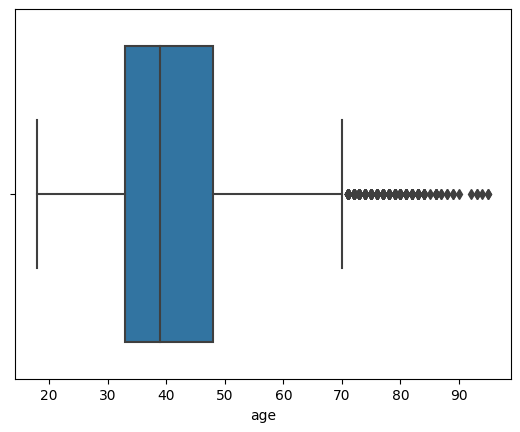

In [37]:

sns.boxplot(x = train.age)

In [38]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'Age_Days_t'
temp = train.copy()
temp = temp.fillna(temp.mean())


discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

<ipython-input-38-4e683bc00782>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


KeyError: ignored

## Tratamiento de Missing

## Pre-Selección de Variables

In [ ]:
## Pre-Selección de Variables

### Estandarización

## Regresión Logística